In [50]:
import numpy as np
import matplotlib.pyplot as plt


In [128]:
# i. Generate Samples
N = 150
mean = 0.0
standard_deviation = 10.0
x = np.zeros(N)
for i in range(N):
    x[i] = i

sample_points = np.random.normal(mean, standard_deviation, N)

In [129]:
# ii. Construct a Design Matrix
num_features = 3
rows = N
cols = num_features
features = [1,1,2]
X = np.zeros((N, num_features))

#Design Matrix
for i in range(N):
    X[i][0] = 1

for i in range(1,len(features)):
    for j in range(N):
        X[j][i] = pow(sample_points[j],features[i])

In [159]:
#iii. Sample True values using Uniform Distribution
low = -100
high = 100
true_params = np.random.uniform(low, high, N)

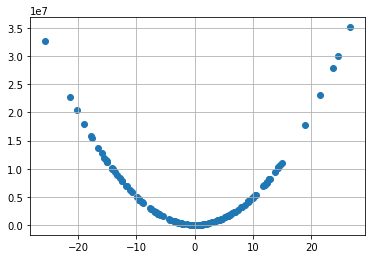

In [160]:
# iv... Use the design matrix and the true_values to create the y-values
true_params = true_params.transpose()
y_values = true_params.dot(X)

y = np.zeros(N)

for i in range(N):
    y[i] = y_values[0] + y_values[1] * sample_points[i] + y_values[2] * pow(sample_points[i],2) 

plt.scatter(sample_points, y)
plt.grid(True)
plt.show()


# Part (b)

## Use the Moore - Penrose pseudo - inverse to calculate the closed form solution

In [161]:
# i...
theta = (np.linalg.inv(X.transpose().dot(X))).dot(X.transpose()).dot(y)
print(theta)

[  511.73695851 -4315.98418181 49874.65381583]


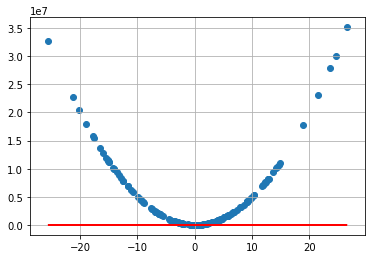

[ 97  95  98  40 110  93 125  51  58  16 107 123 127  38 144 111 104  90
 124  89 142 129  71  70  74  13 136  92  53  63  29  49  14  83 101  82
  47 149 128  86   1  36 138  64  26  65  57  68  18 113 147   6   0  84
  45 100  88  66  25  19 102  99  10  46  22 137  31 131  37  21  32 115
 119  24  81  76  67  54 122  62 121 108 143  96  59 130  85 112  87  35
  20 132  91 106  17  11  33  41 114  48  72 148  43  61   4   7 135  44
  50  23  80  69  79  34   8  30 146  39 109   5 118  94  55 134  27 103
   2  15  42 120  75 141 126 140  60   9  52  56  28 116  73 105 117 133
   3  77 139  78  12 145]


In [162]:
# ii...Learned parameters to the true params
new_y = np.zeros(N)

for i in range(N):
    new_y[i] = theta[0] + theta[1] * sample_points[i] + theta[2] * pow(sample_points[i],2)


plt.plot(sample_points,new_y.argsort(),'r')
plt.scatter(sample_points, y)
plt.grid(True)
plt.show()

# Get the Error 

SSE = 0.0
for i in range(N):
    SSE += 0.5 * (pow(new_y[i] - y[i],2))
    
print(new_y.argsort())